Objectif du module: passer un message avec un graph.<br>
Data RTE: https://rte-france.com/fr/eco2mix/eco2mix-consommation<br>

In [44]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [69]:
data_nationales_raw = pd.read_pickle("data/df_data_nationales.pkl")
data_regionales_raw = pd.read_pickle("data/df_data_regionales.pkl")
data_eolien_norm_raw = pd.read_pickle("data/df_eolien_norm.pkl")
data_solaire_norm_raw = pd.read_pickle("data/df_solaire_norm.pkl")
data_temperatures_raw = pd.read_pickle("data/df_temperatures.pkl")

# Thermo-sensibilité de la consommation

La consommation d’électricité en France dépend fortement de la température, notamment
pendant les mois d’hiver (chauffage électrique) : en hiver, on consomme 2 400 MW
supplémentaire par degré perdu. Cette thermo-sensibilité électrique est pour moitié due au
chauffage électrique résidentiel.<br>
https://bilan-electrique-2018.rte-france.com/sensibilite-a-la-temperature-et-aux-usages/#<br>
http://www.carbone4.com/wp-content/uploads/2016/08/Carbone4_Energies_Reseau_et_pointe_de_demande.pdf<br>
<ul>
    <li>Comment évolue cette dépendance à la température ?</li>
    <li>Quelles différences entre régions ?</li>
    </ul>

In [81]:
data_temperatures_raw

Region,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Grand-Est,Hauts-de-France,Ile-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,PACA,Pays-de-la-Loire
date_validite,,,,,,,,,,,,
2013-01-01 23:00:00,5.75,3.55,6.400000,3.55,4.78,4.50,3.54,4.6,5.0,5.933333,6.750,4.45
2013-01-02 00:00:00,5.30,2.95,6.366667,3.25,4.42,4.60,3.38,4.8,5.1,5.600000,6.425,4.10
2013-01-02 01:00:00,4.90,2.35,6.300000,3.10,4.06,4.75,3.34,5.0,5.3,5.400000,6.150,3.95
2013-01-02 02:00:00,4.60,1.85,5.966667,3.15,3.74,4.80,3.44,5.2,5.4,5.283333,5.875,3.90
2013-01-02 03:00:00,4.30,1.50,5.833333,3.00,3.40,4.90,3.46,5.3,5.3,5.316667,5.600,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-18 18:00:00,9.15,9.25,7.800000,10.30,7.84,7.20,7.54,7.5,11.5,9.700000,10.425,8.15
2018-01-18 19:00:00,9.05,9.05,7.266667,9.80,7.40,6.70,7.16,6.9,11.5,9.333333,10.000,7.10
2018-01-18 20:00:00,9.05,8.65,6.833333,9.20,6.98,6.25,6.86,6.4,11.5,9.383333,9.800,6.40


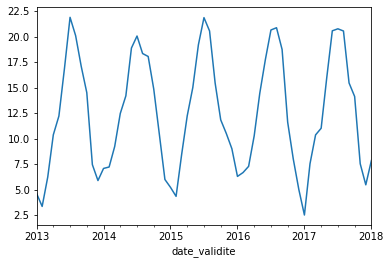

In [30]:
data_temp.resample('1M').mean().mean(axis=1).plot()

In [15]:
data_nationales.describe()

,Consommation,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
count,122736.000000,122736.000000,122736.000000,122736.000000,122736.000000,122736.000000,122736.000000,122736.000000,122736.000000,122736.000000,122736.000000
mean,54575.339884,339.186090,1252.835028,3038.899508,45553.978254,2315.777628,802.891409,7294.958113,-816.434143,898.849702,-6105.612909
std,12184.276144,308.492226,1224.463509,2387.018197,6766.979682,1855.206779,1230.641757,2792.407554,1027.010078,172.446980,3709.975713
min,29477.000000,18.000000,-133.000000,234.000000,26369.000000,21.000000,-2.000000,1387.000000,-3651.000000,441.000000,-17230.000000
25%,45353.000000,160.000000,154.000000,775.000000,40399.000000,993.000000,0.000000,5167.000000,-1631.000000,744.000000,-8686.000000
50%,52868.000000,279.000000,980.000000,2428.000000,44213.000000,1753.000000,11.000000,7136.000000,-168.000000,922.000000,-6335.500000
75%,62987.000000,449.000000,1969.000000,4626.000000,50818.000000,3099.000000,1331.000000,9259.250000,-20.000000,1040.000000,-3940.000000
max,102098.000000,5926.000000,6265.000000,9700.000000,61712.000000,12287.000000,6430.000000,17434.000000,-1.000000,1364.000000,10011.000000


In [182]:
plt.rcParams.update({'font.size': 22})

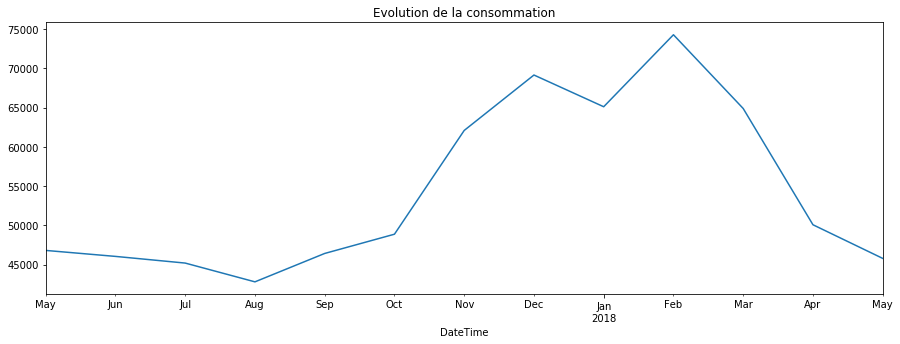

In [43]:
data_nationales.loc['2017-05-01':'2018-05-01'].Consommation.resample('1M').mean().plot(figsize=(15,5))
plt.title('Evolution de la consommation');

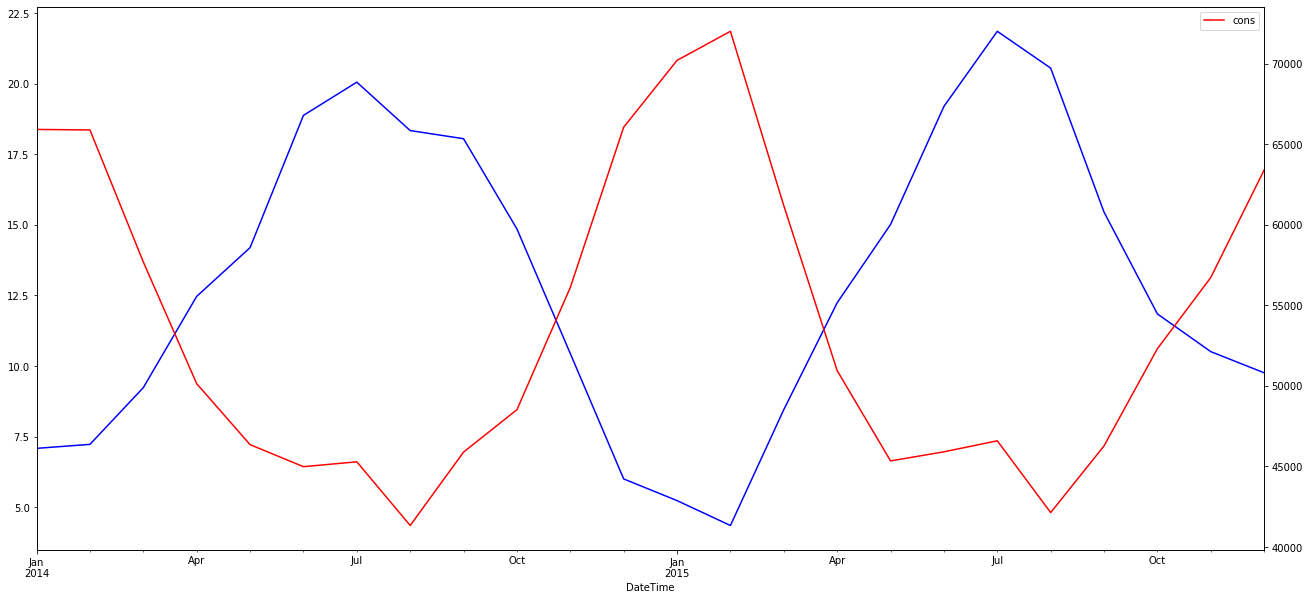

In [76]:
plt.rcParams['figure.figsize'] = (22,10)

fig, ax = plt.subplots()
data_temperatures_raw.loc['2014-01-01':'2015-12-01'].resample('1M').mean().mean(axis=1).plot(ax=ax, style='b-', label='temp')
# same ax as above since it's automatically added on the right
data_nationales_raw.loc['2014-01-01':'2015-12-01'].Consommation.resample('1M').mean().plot(ax=ax, style='r-', secondary_y=True, label='cons')
plt.legend()

In [51]:
plt.rcParams.keys()

/home/campus-5/anaconda3/lib/python3.7/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

## Regions

In [179]:
households_Normandie = 1475798
households_Bretagne = 1503317
households_PDL = 1640347
households_IDF = 5140884
households_GE = 2457779
households_CVDL = 1152027
households_BFC = 1284952
households_NA = 2742900
households_ARA = 3501972
households_Occitanie = 2662868
households_PACA = 2268060
households_HDF = 2518771


households_France = households_Normandie + households_Bretagne + households_PDL + households_IDF + gouseholds_GE + households_CVDL + households_BFC + households_NA + households_ARA + households_Occitanie +households_PACA + households_HDF

data_normalized=pd.DataFrame(columns=['Normandie','Bretagne','PDL','IDF','GE','CVDL','BFC','NA','ARA','Occitanie','PACA','HDF','National'])
data_normalized.National = data_regionales_raw.Consommation.sum(axis=1)
data_normalized.National = data_normalized.National / households_France

data_normalized.Normandie = data_regionales_raw['Consommation',    'Normandie']
data_normalized.Normandie = data_normalized.Normandie / households_Normandie

data_normalized.Bretagne = data_regionales_raw['Consommation',    'Bretagne']
data_normalized.Bretagne = data_normalized.Bretagne / households_Bretagne

data_normalized.PDL = data_regionales_raw['Consommation',    'Pays-de-la-Loire']
data_normalized.PDL = data_normalized.PDL / households_PDL

data_normalized.IDF = data_regionales_raw['Consommation',    'Ile-de-France']
data_normalized.IDF = data_normalized.IDF / households_IDF

data_normalized.GE = data_regionales_raw['Consommation',    'Grand-Est']
data_normalized.GE = data_normalized.GE / households_GE

data_normalized.CVDL = data_regionales_raw['Consommation',    'Centre-Val de Loire']
data_normalized.CVDL = data_normalized.CVDL / households_CVDL

data_normalized.BFC = data_regionales_raw['Consommation',    'Bourgogne-Franche-Comté']
data_normalized.BFC = data_normalized.BFC / households_BFC

data_normalized.NA = data_regionales_raw['Consommation',    'Nouvelle-Aquitaine']
data_normalized.NA = data_normalized.NA / households_NA

data_normalized.ARA = data_regionales_raw['Consommation',    'Auvergne-Rhône-Alpes']
data_normalized.ARA = data_normalized.ARA / households_ARA

data_normalized.Occitanie = data_regionales_raw['Consommation',    'Occitanie']
data_normalized.Occitanie = data_normalized.Occitanie / households_Occitanie

data_normalized.PACA = data_regionales_raw['Consommation',    'PACA']
data_normalized.PACA = data_normalized.PACA / households_PACA

data_normalized.HDF = data_regionales_raw['Consommation',    'Hauts-de-France']
data_normalized.HDF = data_normalized.HDF / households_HDF

data_normalized.dropna(inplace=True)
data_normalized = data_normalized*1000

data_normalized['Sud'] = (data_normalized['Occitanie'] + data_normalized['NA']) /2
data_normalized['Nord'] = (data_normalized['Normandie'] + data_normalized['Bretagne'] + data_normalized['HDF'] + data_normalized['PDL']) /4

data_temperatures_raw['Sud'] = (data_temperatures_raw['Occitanie'] + data_temperatures_raw['Nouvelle-Aquitaine']) /2
data_temperatures_raw['Nord'] = (data_temperatures_raw['Normandie'] + data_temperatures_raw['Bretagne'] + data_temperatures_raw['Hauts-de-France'] + data_temperatures_raw['Pays-de-la-Loire']) /4

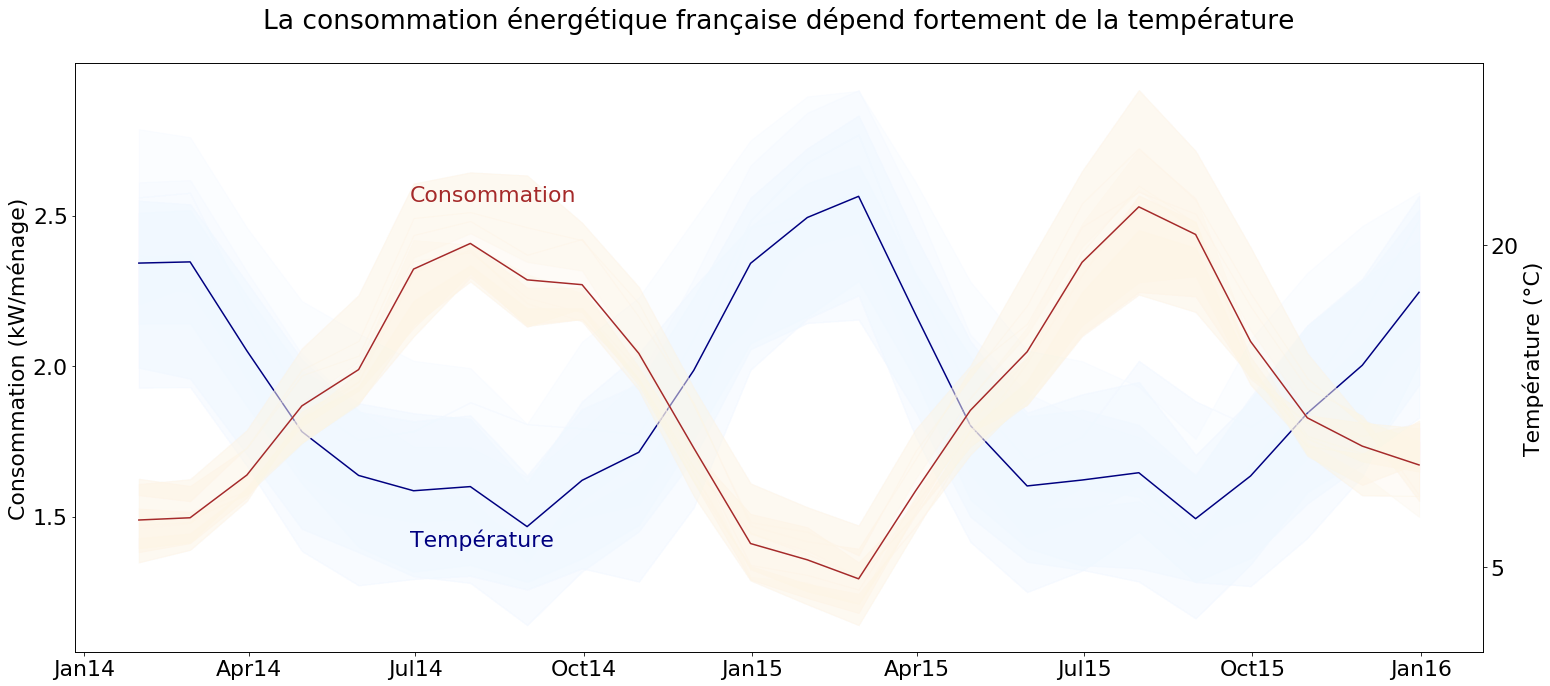

In [364]:
time = data_normalized.loc['2014-01-01':'2015-12-01'].resample('1M').mean().index
consump = data_normalized.loc['2014-01-01':'2015-12-01'].resample('1M').mean()
temp = data_temperatures_raw.loc['2014-01-01':'2015-12-01'].resample('1M').mean()
mean_consump = data_normalized.loc['2014-01-01':'2015-12-01'].resample('1M').mean().mean(axis=1)
mean_temp = data_temperatures_raw.loc['2014-01-01':'2015-12-01'].resample('1M').mean().mean(axis=1)
fig, ax1 = plt.subplots()
# ax1.axvline(x= data_normalized.loc['2014-01-01'].resample('1M').mean().index, ymin=0, ymax=1)
# ax1.axhline(x= data_normalized.loc['2014-01-01'].resample('1M').mean().index, ymin=0, ymax=1
color1 = 'brown'
ax1.set_ylabel('Consommation (kW/ménage)')
ax1.tick_params(axis='y')
ax1.set_yticks([1.5,2,2.5])
for i in range(11):
    a1 = data_normalized.loc['2014-01-01':'2015-12-01'].iloc[:,i].resample('1M').mean()
    a2=data_normalized.loc['2014-01-01':'2015-12-01'].iloc[:,i+1].resample('1M').mean()
    ax1.fill_between(time, a1, a2, color='aliceblue', alpha='0.25')
ax2 = ax1.twinx()
color2 = 'navy'


for i in range(11):
    a1=data_temperatures_raw.loc['2014-01-01':'2015-12-01'].resample('1M').mean().iloc[:,i]
    a2=data_temperatures_raw.loc['2014-01-01':'2015-12-01'].resample('1M').mean().iloc[:,i+1]
    ax2.fill_between(time, a1, a2, color='oldlace', alpha='0.3')
ax1.plot(time, mean_consump, color=color2)



# ticklabels = [item.strftime('%b') + item.strftime('%y')for item in time]
ticklabels=['Jan14','Apr14','Jul14','Oct14','Jan15','Apr15','Jul15','Oct15','Jan16']
ax2.set_xticklabels(ticklabels)

ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylabel('Température (°C)')
ax2.set_yticks([5,20])

ax2.plot(time, mean_temp, color=color1)

ax1.set_title('La consommation énergétique française dépend fortement de la température', pad=35)


ax2.annotate('Consommation',(410,485),xycoords='figure pixels', color=color1)
ax2.annotate('Température',(410,140),xycoords='figure pixels', color=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

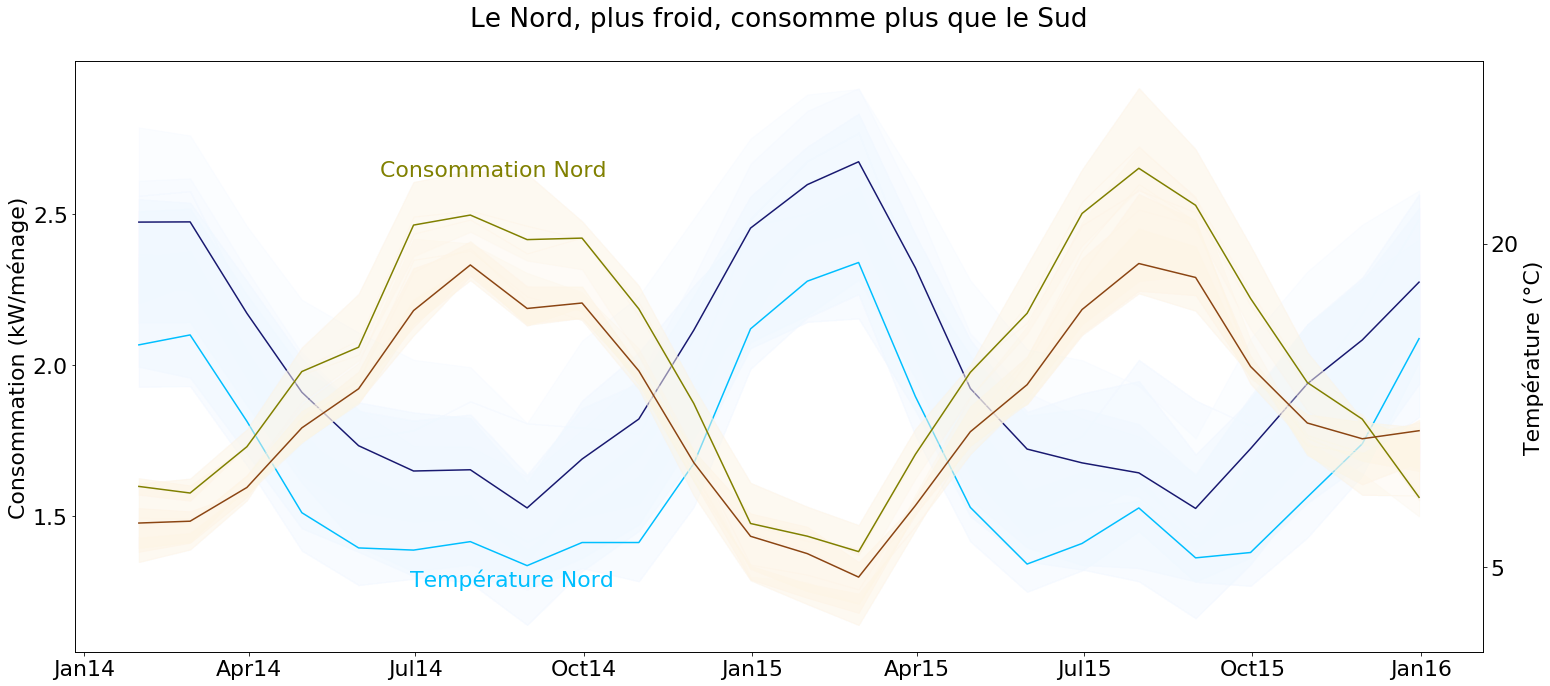

In [362]:
time = data_normalized.loc['2014-01-01':'2015-12-01'].resample('1M').mean().index
consump = data_normalized.loc['2014-01-01':'2015-12-01'].resample('1M').mean()
temp = data_temperatures_raw.loc['2014-01-01':'2015-12-01'].resample('1M').mean()

consump_nord = data_normalized['Nord'].loc['2014-01-01':'2015-12-01'].resample('1M').mean()
temp_nord = data_temperatures_raw['Nord'].loc['2014-01-01':'2015-12-01'].resample('1M').mean()
consump_sud = data_normalized['Sud'].loc['2014-01-01':'2015-12-01'].resample('1M').mean()
temp_sud = data_temperatures_raw['Sud'].loc['2014-01-01':'2015-12-01'].resample('1M').mean()

fig, ax1 = plt.subplots()
# ax1.axvline(x= data_normalized.loc['2014-01-01'].resample('1M').mean().index, ymin=0, ymax=1)
# ax1.axhline(x= data_normalized.loc['2014-01-01'].resample('1M').mean().index, ymin=0, ymax=1
color1 = 'brown'
ax1.set_ylabel('Consommation (kW/ménage)')
ax1.tick_params(axis='y')
ax1.set_yticks([1.5,2,2.5])
for i in range(11):
    a1 = data_normalized.loc['2014-01-01':'2015-12-01'].iloc[:,i].resample('1M').mean()
    a2=data_normalized.loc['2014-01-01':'2015-12-01'].iloc[:,i+1].resample('1M').mean()
    ax1.fill_between(time, a1, a2, color='aliceblue', alpha='0.25')
ax2 = ax1.twinx()
color2 = 'navy'


for i in range(11):
    a1=data_temperatures_raw.loc['2014-01-01':'2015-12-01'].resample('1M').mean().iloc[:,i]
    a2=data_temperatures_raw.loc['2014-01-01':'2015-12-01'].resample('1M').mean().iloc[:,i+1]
    ax2.fill_between(time, a1, a2, color='oldlace', alpha='0.3')
ax1.plot(time, consump_nord, color='midnightblue')
ax1.plot(time, consump_sud, color='deepskyblue')



# ticklabels = [item.strftime('%b') + item.strftime('%y')for item in time]
ticklabels=['Jan14','Apr14','Jul14','Oct14','Jan15','Apr15','Jul15','Oct15','Jan16']
ax2.set_xticklabels(ticklabels)

ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylabel('Température (°C)')
ax2.set_yticks([5,20])

ax2.plot(time, temp_sud, color='olive')
ax2.plot(time, temp_nord, color='saddlebrown')

ax1.set_title('Le Nord, plus froid, consomme plus que le Sud', pad=35)

ax2.annotate('Consommation Nord',(380,510),xycoords='figure pixels', color='olive')
ax2.annotate('Température Nord',(410,100),xycoords='figure pixels', color='deepskyblue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()